$\,\,Note:\,\,\Omega^{'}(\,\,in\,\,dynamo\,\,number\,\,P\,\,) = 10^{-8}$

## Profile

In [4]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib as mpl
# from tqdm import tqdm
from tqdm.notebook import tqdm



'--------------------------------------------------------------------------------------------'

def a(x):
    if x==0:
        return 0
    else:
        return x/(2*x+1)

def b(x):
    if x==0:
        return 0
    else:
        return (x+1)/(2*x+1)

def g(x):
    if x==0:
        return 0
    else:
        return x*(x+1)/(2*x+1)

def func_h(x):
    if x==0:
        return 0
    else:
        return x*(x+1)


'--------------------------------------------------------------------------------------------'


def alpha(x,a_profile):
    if a_profile == 'r_dependence':
        # xa , xb , d = 0.675 , 0.725 , 0.05

        '对照'
        xa , xb , d = 0.7 , 0.8 , 0.05
        ans = ( 1 + math.erf( (x-xa) / d ) ) * ( 1 - math.erf( (x-xb) / d ) ) / 4

    elif a_profile == 'c':
        ans = 1
    
    return ans


'--------------------------------------------------------------------------------------------'


def Omega_1(x):
    ans = 1/2 * ( 1 + math.erf( ( x - 0.7 ) / 0.05 ) )
    return ans

def d_Omega_r(x):
    ans = 20 / math.pi**(0.5) * math.exp( - ( ( x - 0.7 ) / 0.05 )**2 )
    return ans


'--------------------------------------------------------------------------------------------'


def An(x):
    ans = a(x)*a(x+1)
    return ans

def Bn(x):
    ans = a(x)*b(x+1) + b(x)*a(x-1)
    return ans

def Cn(x):
    ans = b(x)*b(x-1)
    return ans


'--------------------------------------------------------------------------------------------'
'角速度径向求导项'



def an_3_2(x):
    ans = An(x-2) * g(x-3)
    return ans

def an_1_2(x):
    ans = ( Bn(x)-An(x-2) ) * g(x-1)
    return ans

def an1_2(x):
    ans = ( Cn(x+2) - Bn(x) ) * g(x+1)
    return ans

def an3_2(x):
    ans = -Cn(x+2) * g(x+3)
    return ans



def an_5_4(x):
    ans = An(x-4)*An(x-2) * g(x-5)
    return ans

def an_3_4(x):
    ans = ( An(x-2)*Bn(x) + An(x-2)*Bn(x-2) - An(x-4)*An(x-2) ) * g(x-3)
    return ans

def an_1_4(x):
    ans= ( An(x)*Cn(x+2) + Bn(x)**2 + An(x-2)*Cn(x) - An(x-2)*Bn(x) - An(x-2)*Bn(x-2) ) * g(x-1)
    return ans

def an1_4(x):
    ans = ( Bn(x+2)*Cn(x+2) + Bn(x)*Cn(x+2) - An(x)*Cn(x+2) - Bn(x)**2 - An(x-2)*Cn(x) ) * g(x+1)
    return ans

def an3_4(x):
    ans = ( Cn(x+4)*Cn(x+2) - Bn(x+2)*Cn(x+2) - Bn(x)*Cn(x+2) ) * g(x+3)
    return ans

def an5_4(x):
    ans = Cn(x+4)*Cn(x+2) * g(x+5)
    return ans


'相加'
def an_5(x):
    ans = -49.43 * an_5_4(x)
    return ans

def an_3(x):
    ans = -1 * ( 49.43*an_3_4(x) + 39.26*an_3_2(x) )
    return ans

def an_1(x):
    ans = ( 38.77*g(x-1) - 49.43*an_1_4(x) - 39.26*an_1_2(x) )
    return ans

def an1(x):
    ans = -( 38.77*g(x+1) + 49.43*an1_4(x) + 39.26*an1_2(x) )
    return ans

def an3(x):
    ans = -1 * ( 49.43*an3_4(x) + 39.26*an3_2(x) )
    return ans

def an5(x):
    ans = -49.43 * an5_4(x)
    return ans



'--------------------------------------------------------------------------------------------'
'角速度纬向求导项'

def an_5_j(x):
    ans = -49.43 * 4 * An(x-5) * An(x-3) * a(x-1)
    return ans

def an_3_j(x):
    ans = 119.2 * An(x-3) * a(x-1) \
        - 49.43 * 4 * ( An(x-3)*An(x-1)*b(x+1) + ( An(x-3)*Bn(x-1) + Bn(x-3)*An(x-3) )*a(x-1) )
    return ans

def an_1_j(x):
    ans = 39.26 * 2 * a(x-1) \
        + 119.2 * ( An(x-1) * b(x+1) + Bn(x-1) * a(x-1) ) \
        - 49.43 * 4 * ( ( An(x-1)*Bn(x+1) + Bn(x-1)*An(x-1) )*b(x+1) \
                        + ( An(x-1)*Cn(x+1) + Bn(x-1)**2 + Cn(x-1)*An(x-3) )*a(x-1) )
    return ans

def an1_j(x):
    ans = 39.26 * 2 * b(x+1) \
        + 119.2 * ( Bn(x+1) * b(x+1) + Cn(x+1) * a(x-1) ) \
        - 49.43 * 4 * ( ( An(x+1)*Cn(x+3) + Bn(x+1)*Bn(x+1) + Cn(x+1)*An(x-1) )*b(x+1) \
                        + ( Bn(x+1)*Cn(x+1) + Cn(x+1)*Bn(x-1) )*a(x-1) )
    return ans

def an3_j(x):
    ans = 119.2 * Cn(x+3) * b(x+1) \
        - 49.43 * 4 * ( ( Bn(x+3)*Cn(x+3) + Cn(x+3)*Bn(x+1) )*b(x+1) + Cn(x+3)*Cn(x+1)*a(x-1) )
    return ans

def an5_j(x):
    ans = -49.43 * 4 * Cn(x+5) * Cn(x+3) * b(x+1)
    return ans



'--------------------------------------------------------------------------------------------'
def eta(x):
    # ans = 2.2*10**4 + 1/2*2*10**7*( 1+ math.erf( (x-0.7)/0.03)) + \
    #     1/2*2.5*10**8*( 1+ math.erf( (x-0.9)/0.05))
    
    # ans = 2.2*10**4 + 1/2*2*10**7*( 1+ math.erf( (x-0.9)/0.03)) + \
    # 1/2*2.5*10**8*( 1+ math.erf( (x-0.65)/0.05))

    # return ans / 10**8
    # return 1

    '对照,单位为10^8 m^2/s'

    ans = ( 0.1 + 1/2*( 1 - 0.1 ) * ( 1+ math.erf( (x-0.7)/0.05) ) )*0.3
    return ans
   

def eta_r(x):
    # ans = 2*10**7/math.pi**0.5/0.03*math.exp( -((x-0.7)/0.03)**2 ) + \
    #     2.5*10**8/math.pi**0.5/0.05*math.exp( -((x-0.9)/0.05)**2 )
    # return ans/10**8

    '对照,单位为10^8 m^2/s'

    ans = 1/2*( 1 - 0.1 ) * 20 / math.pi**0.5 * 2 * math.exp( -( (x-0.7)/0.05 )**2 ) * 0.3
    return ans

## Case1: $\,\,\,\frac{d\Omega}{dr}=\Omega^{'}$ & $\frac{d\Omega}{d\theta}=0$

In [ ]:
def generate1(P,M,n,a_profile='r_dependence'):
    x0,xo=0.6,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 - ( h_2d + h_d/xj )/( 1 + h * ( i + 2 ) ) )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                elif i == n-1:
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                else:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                

            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = ( (h_2d-h_d/xj)/(1-h/x0) -1*( 2*h_2d + func_h( i+1 )/xj**2 ) )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
            
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == n-1:
                    matrix[row][col_before]=P*g(i)
                else:
                    matrix[row][col_next]=-1*P*g(i+2)
                    matrix[row][col_before]=P*g(i)

    return matrix




## Case2: $\,\,\,\,\Omega(r,\theta)$

In [6]:
def generate2(P,M,n,a_profile='r_dependence'):
    x0,xo=0.6,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 - ( h_2d + h_d/xj )/( 1 + h * ( i + 2 ) ) )
                else:
                    matrix[row][col-1] = h_2d - h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + h_d/xj
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                elif i == n-1:
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                else:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                


            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = ( (h_2d-h_d/xj)/(1-h/x0) -1*( 2*h_2d + func_h( i+1 )/xj**2 ) )
                    matrix[row][col+1] = h_2d + h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                else:
                    matrix[row][col-1] = h_2d - h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + h_d/xj            



                '----------------角速度径向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                if i == n-1:
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                else:
                    matrix[row][col_n1] = P * d_Omega_r(xj) * an1(i+1)
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3] = P * d_Omega_r(xj) * an_3(i+1)
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3] = P * d_Omega_r(xj) * an3(i+1)

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5] = P * d_Omega_r(xj) * an_5(i+1)
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    matrix[row][col_n5] = P * d_Omega_r(xj) * an5(i+1)
                        


                '----------------角速度纬向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                xj_1=xj-h
                xj1=xj+h
                if i == n-1:
                    matrix[row][col_n_1 - 1] = 1/xj*xj_1/2*h_d*an_1_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_1 + 1] = -1/xj*xj1/2*h_d*an_1_j(i+1) * Omega_1(xj) * P
                else:
                    matrix[row][col_n1 - 1] = 1/xj*xj_1/2*h_d*an1_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n1 + 1] = -1/xj*xj1/2*h_d*an1_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_1 - 1] = 1/xj*xj_1/2*h_d*an_1_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_1 + 1] = -1/xj*xj1/2*h_d*an_1_j(i+1) * Omega_1(xj) * P
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3 - 1] = 1/xj*xj_1/2*h_d*an_3_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_3 + 1] = -1/xj*xj1/2*h_d*an_3_j(i+1) * Omega_1(xj) * P
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3 - 1] = 1/xj*xj_1/2*h_d*an3_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n3 + 1] = -1/xj*xj1/2*h_d*an3_j(i+1) * Omega_1(xj) * P

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5 - 1] = 1/xj*xj_1/2*h_d*an_5_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_5 + 1] = -1/xj*xj1/2*h_d*an_5_j(i+1) * Omega_1(xj) * P
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    matrix[row][col_n5 - 1] = 1/xj*xj_1/2*h_d*an5_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n5 + 1] = -1/xj*xj1/2*h_d*an5_j(i+1) * Omega_1(xj) * P

    return matrix




## Case3: $\,\,\,\,\,\eta(r)$

In [ ]:
def generate3(P,M,n,a_profile='r_dependence'):
    x0,xo=0.6,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 ) * eta(xj)
                    matrix[row][col+1] = ( h_2d + h_d/xj ) * eta(xj)
                elif j == M-2:
                    matrix[row][col-1] = ( h_2d - h_d/xj ) *eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 - ( h_2d + h_d/xj )/( 1 + h * ( i + 2 ) ) )*eta(xj)
                else:
                    matrix[row][col-1] = ( h_2d - h_d/xj ) * eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 ) * eta(xj)
                    matrix[row][col+1] = ( h_2d + h_d/xj ) * eta(xj) 
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                elif i == n-1:
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                else:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                

            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = ( (h_2d-h_d/xj)/(1-h/x0) -1*( 2*h_2d + func_h( i+1 )/xj**2 ) )*eta(xj)
                    matrix[row][col+1] = ( h_2d + h_d/xj ) * eta(xj)
                elif j == M-2:
                    matrix[row][col-1] = ( h_2d - h_d/xj ) * eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )*eta(xj)
                else:
                    matrix[row][col-1] = ( h_2d - h_d/xj ) * eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )*eta(xj)
                    matrix[row][col+1] = ( h_2d + h_d/xj ) * eta(xj)

                '-----------------磁扩散率求导项-----------------'
                xj_1=xj-h
                xj1=xj+h
                if j == 0:
                    matrix[row][col+1] += 1/xj/2*h_d*xj1*eta_r(xj)
                elif j == M-2:
                    matrix[row][col-1] -= 1/xj/2*h_d*xj_1*eta_r(xj)
                else:
                    matrix[row][col-1] -= 1/xj/2*h_d*xj_1*eta_r(xj)
                    matrix[row][col+1] += 1/xj/2*h_d*xj1*eta_r(xj)

                '----------------角速度径向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                if i == n-1:
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                else:
                    matrix[row][col_n1] = P * d_Omega_r(xj) * an1(i+1)
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3] = P * d_Omega_r(xj) * an_3(i+1)
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3] = P * d_Omega_r(xj) * an3(i+1)

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5] = P * d_Omega_r(xj) * an_5(i+1)
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    matrix[row][col_n5] = P * d_Omega_r(xj) * an5(i+1)
                        


                '----------------角速度纬向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                xj_1=xj-h
                xj1=xj+h
                if i == n-1:
                    matrix[row][col_n_1 - 1] = 1/ xj * xj_1 /2 *h_d*an_1_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_1 + 1] = -1/ xj * xj1 /2 *h_d*an_1_j(i+1) * Omega_1(xj) * P
                else:
                    matrix[row][col_n1 - 1] = 1/ xj * xj_1 /2 *h_d*an1_j(i+1) * Omega_1(xj) * P
                    if col_n1 + 1 <= dim-1:
                        matrix[row][col_n1 + 1] = -1/ xj * xj1 /2 *h_d*an1_j(i+1) * Omega_1(xj) * P
                        
                    matrix[row][col_n_1 - 1] = 1/ xj * xj_1 /2 *h_d*an_1_j(i+1) * Omega_1(xj) * P
                    if col_n_1 + 1 <= dim-1:
                        matrix[row][col_n_1 + 1] = -1/ xj * xj1 /2 *h_d*an_1_j(i+1) * Omega_1(xj) * P
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3 - 1] = 1/ xj * xj_1 /2 *h_d*an_3_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_3 + 1] = -1/ xj * xj1 /2 *h_d*an_3_j(i+1) * Omega_1(xj) * P
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3 - 1] = 1/ xj * xj_1 /2 *h_d*an3_j(i+1) * Omega_1(xj) * P
                    if col_n3 + 1 <= dim-1:
                        matrix[row][col_n3 + 1] = -1/ xj * xj1 /2 *h_d*an3_j(i+1) * Omega_1(xj) * P

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5 - 1] = 1/ xj * xj_1 /2 *h_d*an_5_j(i+1) * Omega_1(xj) * P
                    matrix[row][col_n_5 + 1] = -1/ xj * xj1 /2 *h_d*an_5_j(i+1) * Omega_1(xj) * P
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    # print( i , col_n5 ,row , row+5*(M-1) )
                    matrix[row][col_n5 - 1] = 1/ xj * xj_1 /2 * h_d*an5_j(i+1) * Omega_1(xj) * P
                    if col_n5 + 1 <= dim-1:
                        matrix[row][col_n5 + 1] = -1/ xj * xj1 /2 * h_d*an5_j(i+1) * Omega_1(xj) * P

                
    return matrix




## Define Function

In [8]:
def get_eigvals(P,M,n,s='dont show',a_cfg='r_dependence',Case=3):
    if Case == 1:
        matrix=generate1(P,M,n,a_cfg)
    if Case == 2:
        matrix=generate2(P,M,n,a_cfg)
    if Case == 3:
        # print(P,M,n,a_cfg)
        matrix=generate3(P,M,n,a_cfg)
    # print(matrix)
    # matrix=generate3(P,M,n,a_cfg)
    
    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
        #     print('yes')
    
    if s == 'show':
        print(P)
        print(*list(zip(reL,imL)),sep='\n')
        print('-'*100)

    return reL , imL , matrix



def draw(ax,x,y,i,P,cmap,norm):
    if i=='n':
        # ax.scatter(x,y,s=10,marker='x')
        ax.scatter(x,y,s=1,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)



def get_alpha(P):
    R = 6.96*10**8
    w = 10**(-8)
    eta = 10**8
    ans = abs(P) * eta**2 / ( R**3 * w )
    return ans



def T(k):
    import math
    R = 6.96*10**8
    eta = 10**8
    pi = math.pi
    ans = pi * R**2 / ( k**2 * eta ) / (365*24*3600)
    # ans = R**2 / ( 2*k**2 * eta ) / (365*24*3600)
    return ans



def solution(M=10,n=10,maxi=0,mini=-20,a_cfg='r_dependence',Case=3,P_num=100 ):
    # s='show'
    s='dont show'
    fig,ax=plt.subplots(figsize=(7,7),dpi=100)
    cmap = plt.cm.viridis

    ans=[]
    PL = [i for i in np.linspace(mini,maxi,P_num)]
    for P in tqdm(PL,desc='计算中'):
        norm = Normalize(vmin=mini, vmax=maxi)
        # print(P,M,n,s,a_cfg,Case)
        x , y , Matrix= get_eigvals(P,M,n,s,a_cfg,Case)
        # print(x,y)
        for i,j in zip(x,y):
            tem = abs( i-j )
            if tem < 1e-1:
                ans.append( ( round( i , 3 ) , round( j , 3 ) , round( abs(i-j)/i*100 , 3 ) , \
                             round( P , 3 ) , round( get_alpha(P) , 3 ) , round( 2*i**2 , 3 ) , round( T(i) , 3 ) ) )
        draw(ax,x,y,'n',P,cmap,norm)

    cmap = mpl.cm.viridis
    norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
    im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    cb=fig.colorbar( im , ax=ax , shrink=0.5 )
    cb.ax.invert_yaxis()
    ax.set_xticks([i for i in np.linspace(0,50,21)])
    ax.set_yticks([i for i in np.linspace(0,50,21)])
    lim=2.5
    ax.set_xlim(0,lim*10)
    ax.set_ylim(0,lim*10)
    ax.plot([0,100],[0,100])
    ax.set_aspect(1)
    ax.set_xlabel('Re(k)')
    ax.set_ylabel('Im(k)')
    ax.set_title('M=%d , n=%d'%(M,n))
    plt.show()

    L=[[]]
    count=0
    if len(ans) == 0:
        return ans,fig,ax
    temP = ans[0][3]
    for var_a,var_b,var_c,var_d,var_e,var_f,var_g in ans:
        if abs(temP-var_d)/abs(var_d) < 0.1:
            L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )
        else:
            temP = var_d
            count += 1
            L.append( [] )
            L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )

    for i in L:
        tem = sorted(i,key=lambda x:x[2])
        var_a,var_b,var_c,var_d,var_e,var_f,var_g = str(tem[0][0]),str(tem[0][1]),str(tem[0][2])+'%',str(tem[0][3]),str(tem[0][4]),str(tem[0][5]),str(tem[0][6])
        # print( "kr=%f"%var_a , "ki=%f"%var_b , "diff=%f"%var_c , "P=%f"%var_d ,\
            # "alpha=%f"%var_e, "lambda=%f"%var_f , "T=%f"%var_g )
        print( "kr=%s"%var_a , "ki=%s"%var_b , "diff=%s"%var_c , "P=%s"%var_d ,\
            "alpha=%s"%var_e, "lambda=%s"%var_f , "T=%s"%var_g )
    
    return ans,fig,ax




## Solution

### SingleTest Case3

计算中:   0%|          | 0/200 [00:00<?, ?it/s]

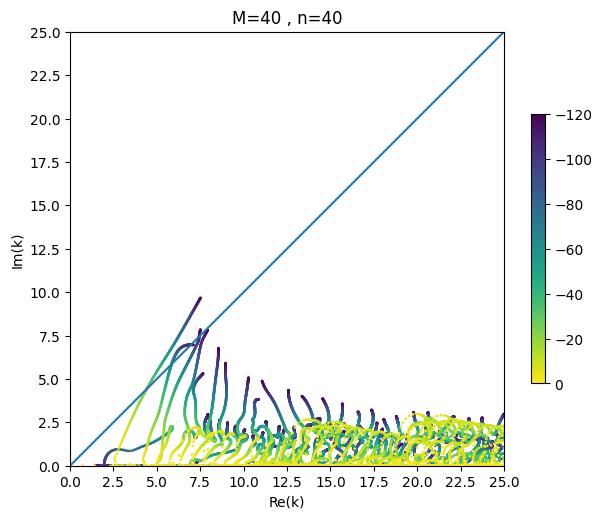

kr=7.437 ki=7.44 diff=0.035% P=-109.749 alpha=0.326 lambda=110.624 T=8.725
kr=7.431 ki=7.372 diff=0.791% P=-107.94 alpha=0.32 lambda=110.436 T=8.739
kr=5.848 ki=5.844 diff=0.07% P=-65.126 alpha=0.193 lambda=68.396 T=14.111
kr=5.802 ki=5.703 diff=1.709% P=-62.111 alpha=0.184 lambda=67.325 T=14.336
kr=4.416 ki=4.424 diff=0.167% P=-27.739 alpha=0.082 lambda=39.008 T=24.742
kr=4.355 ki=4.311 diff=1.009% P=-26.533 alpha=0.079 lambda=37.927 T=25.447


In [13]:
# a_cfg='c'
a_cfg='r_dependence'
mini=-120
maxi=0
M=40
n=40
Case=3
P_num=200
result,fig,ax= solution(M,n,maxi,mini,a_cfg,Case,P_num)


### SingleTest Case2

计算中:   0%|          | 0/300 [00:00<?, ?it/s]

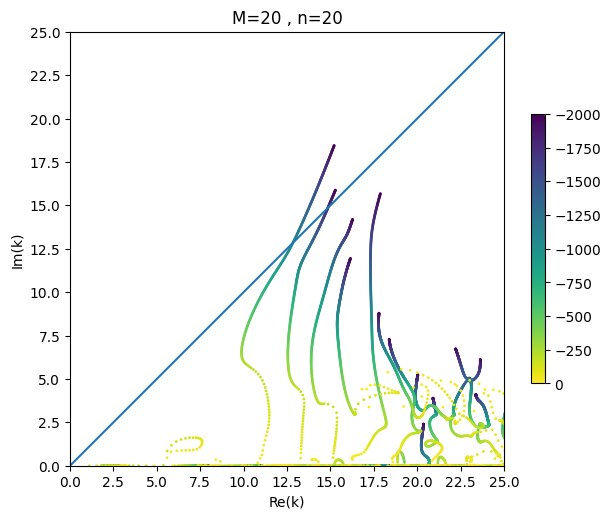

kr=14.852 ki=14.848 diff=0.028% P=-1752.508 alpha=5.198 lambda=441.164 T=2.188
kr=12.84 ki=12.842 diff=0.015% P=-1076.923 alpha=3.194 lambda=329.755 T=2.927


In [ ]:
# # a_cfg='c'
# a_cfg='r_dependence'
# mini=-2000
# maxi=0
# M=20
# n=20
# Case=2
# P_num=300
# result,fig,ax= solution(M,n,maxi,mini,a_cfg,Case,P_num)


### MultiTest

In [ ]:
# # %matplotlib widget 

  
# # a_cfg='c'
# a_cfg='r_dependence'
# mini=-20
# maxi=0
# M=10
# n=10
# Case=3
# P_num=200
# result = solution(M,n,maxi,mini,a_cfg,Case,P_num)

# '储存图像'
# for M in [10,20,30,40,45,50,55,60]:
#     for n in [10]:
#         result , fig , ax = solution(M,n,maxi,mini,a_cfg,Case,P_num)
#         # fig.savefig('pic//M=%d_n=%d.png'%(M,n))

# #计算alpha和T
#         if len(result) == 0:
#             continue
#         temP = result[0][3]
#         L=[[]]
#         count=0
#         for var_a,var_b,var_c,var_d,var_e,var_f,var_g in result:
#             if abs(temP-var_d)/abs(var_d) < 0.1:
#                 L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )
#             else:
#                 temP = var_d
#                 count += 1
#                 L.append( [] )
#                 L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )

#         for i in L:
#             tem = sorted(i,key=lambda x:x[2])
#             var_a,var_b,var_c,var_d,var_e,var_f,var_g = str(tem[0][0]),str(tem[0][1]),str(tem[0][2])+'%',str(tem[0][3]),str(tem[0][4]),str(tem[0][5]),str(tem[0][6])
#             # print( "kr=%f"%var_a , "ki=%f"%var_b , "diff=%f"%var_c , "P=%f"%var_d ,\
#                 # "alpha=%f"%var_e, "lambda=%f"%var_f , "T=%f"%var_g )
#             print( "kr=%s"%var_a , "ki=%s"%var_b , "diff=%s"%var_c , "P=%s"%var_d ,\
#                 "alpha=%s"%var_e, "lambda=%s"%var_f , "T=%s"%var_g )

# # for i in ans:
# #     var_a,var_b,var_c,var_d,var_e,var_f,var_g = i
# #     print( "kr=%f"%var_a , "ki=%f"%var_b , "diff=%f"%var_c , "P=%f"%var_d ,\
# #         "alpha=%f"%var_e, "lambda=%f"%var_f , "T=%f"%var_g )